Project 2: Flipkart Review Sentiment Analysis

In [4]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 3.2 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to C:\Users\Varanasi
[nltk_data]     Shilpa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to C:\Users\Varanasi
[nltk_data]     Shilpa\AppData\Roaming\nltk_data...


True

In [8]:
# Load the dataset with a different encoding
df = pd.read_csv('flipkart_product.csv', encoding='ISO-8859-1')

# Display the first few rows
df.head()


,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [9]:
# Check for null values
print(df.isnull().sum())

# Drop rows with null values
df.dropna(inplace=True)


ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64


In [11]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_review(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Tokenize, remove stopwords, and apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Apply cleaning to the review column (replace 'Review' with the actual column name)
df['cleaned_review'] = df['Review'].apply(clean_review)
df.head()


,ProductName,Price,Rate,Review,Summary,cleaned_review
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,super
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,awesom
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,fair
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,useless product
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,fair


In [18]:
df.columns


Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary', 'cleaned_review'], dtype='object')

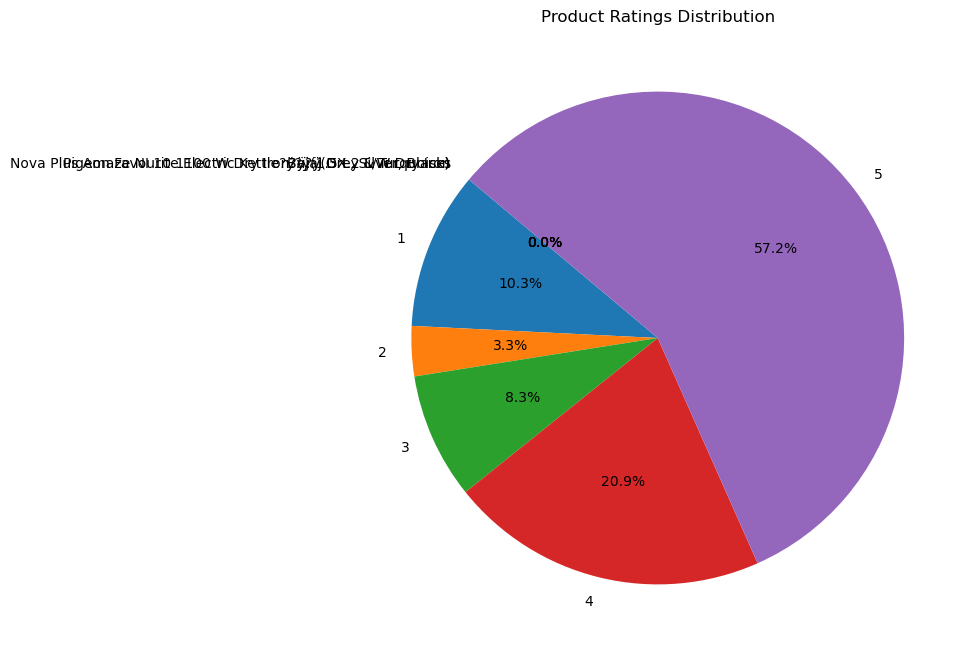

In [29]:
# Count of each rating
rating_counts = df['Rate'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Ratings Distribution')
plt.show()


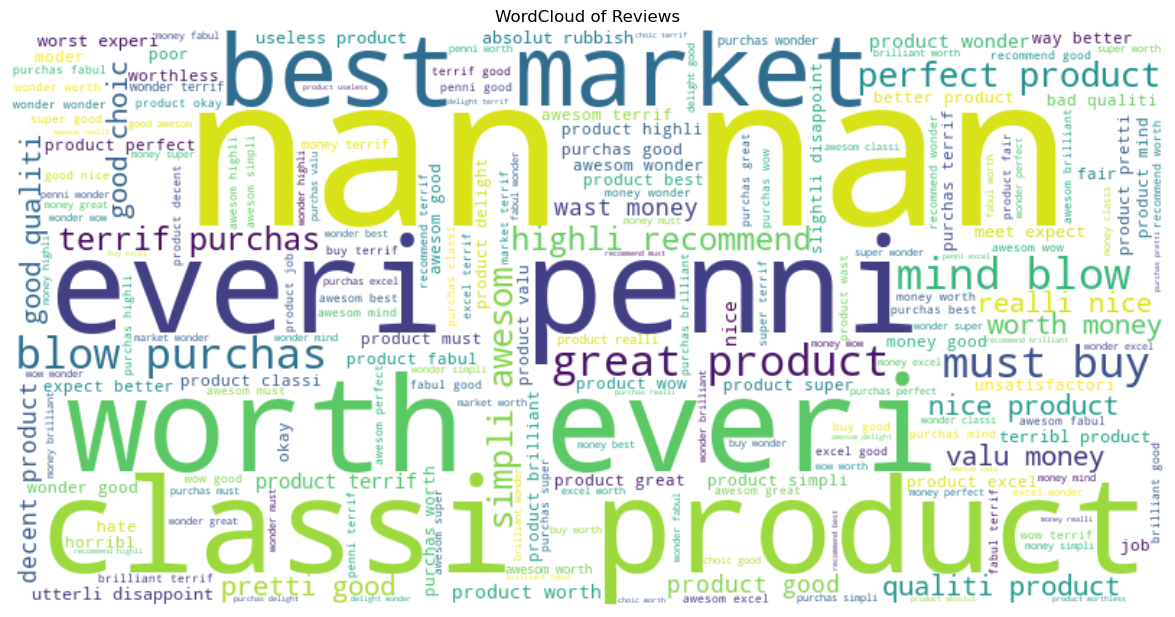

In [20]:
# Combine all cleaned reviews into one string
all_words = ' '.join(df['cleaned_review'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews')
plt.show()


In [25]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

# Apply to cleaned reviews
df['sentiment_scores'] = df['cleaned_review'].apply(get_sentiment_scores)

# Extract compound score
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiments based on compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(categorize_sentiment)


df.head()

,ProductName,Price,Rate,Review,Summary,cleaned_review,sentiment_scores,compound,sentiment
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,super,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5994,Positive
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,awesom,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,fair,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,Positive
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,useless product,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,Negative
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,fair,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,Positive


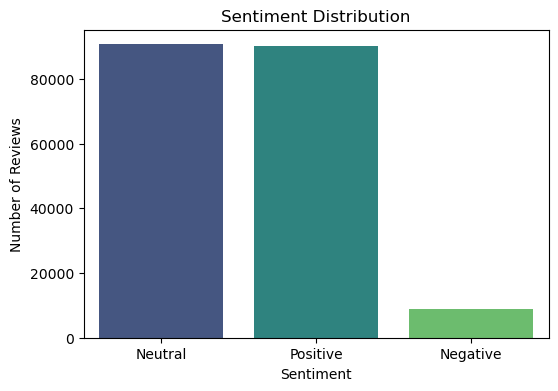

sentiment
Neutral     90655
Positive    90207
Negative     8995
Name: count, dtype: int64


In [26]:
# Count of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Bar plot of sentiment distribution
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()

# Print overall sentiment counts
print(sentiment_counts)
